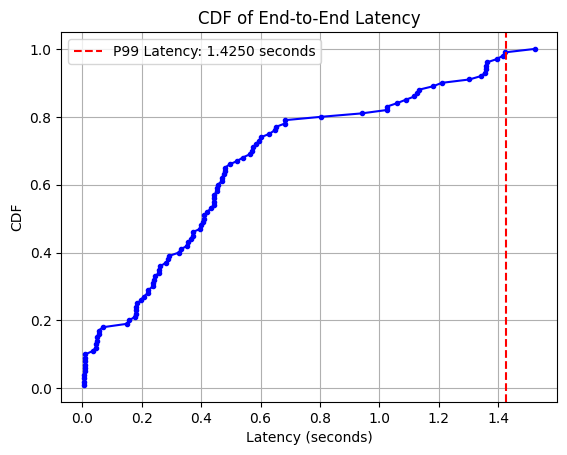

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os

def CDF(data, title, xlabel, ylabel, save_path):
    # Read the log file
    with open(data, 'r') as file:
        lines = file.readlines()

    # Extract latency values
    latencies = []
    for line in lines:
        if "Request /v1/completions latency:" in line:
            latency = float(line.split("latency:")[1].split("seconds")[0].strip())
            latencies.append(latency)
            if len(latencies) >= 100:
                break

    # Compute the CDF
    latencies = np.sort(latencies)
    cdf = np.arange(1, len(latencies) + 1) / len(latencies)

    # Calculate P99 latency
    p99_latency = np.percentile(latencies, 99)

    # Plot the CDF
    plt.figure()
    plt.plot(latencies, cdf, marker='.', linestyle='-', color='b')
    plt.axvline(p99_latency, color='r', linestyle='--', label=f'P99 Latency: {p99_latency:.4f} seconds')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.savefig(save_path)
    plt.show()

# Example usage
CDF('./server_log.txt', 'CDF of End-to-End Latency', 'Latency (seconds)', 'CDF', './cdf_e2e_latency.png')

